### Student Information
Name: 俞政佑

Student ID: 109080076

GitHub ID: QQbluecatQQ

Kaggle name: chengyu

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

![snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

### HW2-1 Take Home Exercises

In [6]:
# load data and 確認 data
import pandas as pd

# load data
train_df = pd.read_pickle("../train_df.pkl")
test_df = pd.read_pickle("../test_df.pkl")

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

print(train_df.head())
print(test_df.head())



Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)
         id                                               text emotion  \
839   10839  Grateful for all the hungry people in my life!...   anger   
2630  30626        only time I am ever cheering for you Johnny     joy   
32    10032  I blame the whole season on Natalie! The seaso...   anger   
2398  30394  @AimiSyafiqahR go check up with your bf. He'll...     joy   
411   10411  @JasonMillerinDC @realDonaldTrump Prudence sug...   anger   

      intensity  
839       0.167  
2630      0.340  
32        0.792  
2398      0.500  
411       0.500  
        id                                               text  emotion  \
322  40835  @Eeevah14 don't I know it, try not to fret my ...  sadness   
114  21177  Okay. Brace yourself. I will attempt my first ...     fear   
325  40838  @GolfStrat out of Rory starts. What would your...  sadness   
267  30896  It feels good to get outside for a minute and ...      joy   
307  40820  M

#### Exercise 1

Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [7]:
# Answer here
# find tran_df and test_df 中, 前 30 個常出現的 word

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# 先確認一下 data
# print(type(train_df['text'][0]))
# print((train_df['text'][0]))

# 建立 feature matrix
train_count = CountVectorizer()
test_count = CountVectorizer()
train_feature_matrix = train_count.fit_transform(train_df['text'])
test_feature_matrix = test_count.fit_transform(test_df['text'])

# print(train_feature_matrix[0])

# 算 frequency
train_frequency = np.asarray(train_feature_matrix.sum(axis=0))[0]
test_frequency = np.asarray(test_feature_matrix.sum(axis=0))[0]

# 取出前 30 個常出現的 word 的 index
train_top_30 = np.argsort(train_frequency)[::-1][:30]
test_top_30 = np.argsort(test_frequency)[::-1][:30]

# 找出對應的 word
train_top_30_word = train_count.get_feature_names_out()[train_top_30]
test_top_30_word  = test_count.get_feature_names_out()[test_top_30]

# 找出對應的 frequency
train_top_30_frequency = train_frequency[train_top_30]
test_top_30_frequency = test_frequency[test_top_30]

print("train_top_30_word: ", train_top_30_word)
print("train_top_30_frequency: ", train_top_30_frequency)
print("test_top_30_word: ", test_top_30_word)
print("test_top_30_frequency: ", test_top_30_frequency)

# ploty 作圖
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=train_top_30_word,
    y=train_top_30_frequency,
))
fig.update_layout(
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(size=13)),
    
    title="Top 30 words in training data",
    xaxis_title="Words",
    yaxis_title="Frequencies"
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=test_top_30_word,
    y=test_top_30_frequency,
))
fig.update_layout(
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(size=13)),
    
    title="Top 30 words in testing data",
    xaxis_title="Words",
    yaxis_title="Frequencies"
)
fig.show()

train_top_30_word:  ['the' 'to' 'and' 'you' 'of' 'is' 'it' 'in' 'that' 'my' 'for' 'on' 'be'
 'me' 'this' 'so' 'have' 'not' 'just' 'but' 'with' 'at' 'can' 'like' 'all'
 'are' 'your' 'was' 'when' 'if']
train_top_30_frequency:  [1736 1289  955  796  793  787  717  626  537  535  446  390  383  380
  350  328  312  303  301  293  288  269  257  243  243  231  229  228
  226  216]
test_top_30_word:  ['the' 'to' 'and' 'it' 'of' 'you' 'is' 'in' 'for' 'that' 'my' 'on' 'be'
 'me' 'was' 'so' 'can' 'at' 'have' 'all' 'just' 'are' 'with' 'but' 'get'
 'your' 'up' 'this' 'like' 'not']
test_top_30_frequency:  [153 138  92  83  83  82  77  69  57  55  52  46  40  36  34  34  32  30
  30  30  29  29  29  26  26  24  24  24  24  24]


### exercise 2
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [8]:
# Answer here
import  nltk
from sklearn.feature_extraction.text import TfidfVectorizer
TFid_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
TFid_1000.fit(train_df['text'])
feature_names_TFid_1000 = TFid_1000.get_feature_names_out()

print("feature_names_TFid_1000 shape: ", feature_names_TFid_1000.shape)

print("TFid_1000 feature_names [100:110]: ", feature_names_TFid_1000[100:110])
print("😂 in feature_names_TFid_1000: ", "😂" in feature_names_TFid_1000)



c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



feature_names_TFid_1000 shape:  (1000,)
TFid_1000 feature_names [100:110]:  ['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']
😂 in feature_names_TFid_1000:  True


In [15]:
# confusion matrix 的作圖函數
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [ ]:
# 準備 train data and test data
import nltk
from sklearn.tree import DecisionTreeClassifier
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

training accuracy: 0.99
testing accuracy: 0.68
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



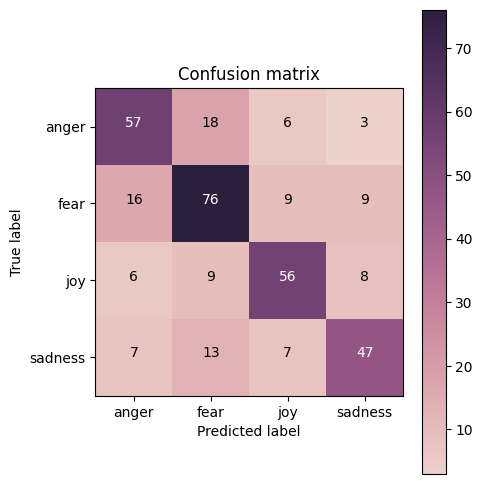

In [16]:
# decision tree model and result
DT_model = DecisionTreeClassifier(random_state=1)
DT_model = DT_model.fit(X_train, y_train)
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_test_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### Exercise 3
Can you interpret the results above? What do they mean?

In [ ]:
# answer
# 1. accuracy
# training accuracy: 0.99
# testing accuracy: 0.68
# 首先, 先從 train 和 test 的 accuracy 可以看出來, 這個 model 有 overfitting 的問題, 因為 decition tree 的特性, 他會根據 train data 的細節與特例進行分割, 因此容易導致 overtfitting,
# 或許可以嘗試調整 tree 的深度, 或是換成 random forest 來解決

# 2. classification_report
#              precision    recall  f1-score   support

#        anger       0.66      0.68      0.67        84
#         fear       0.66      0.69      0.67       110
#          joy       0.72      0.71      0.71        79
#      sadness       0.70      0.64      0.67        74

#     accuracy                           0.68       347
#    macro avg       0.68      0.68      0.68       347
# weighted avg       0.68      0.68      0.68       347

# percision: 預測真且真實真 / 預測真 
# recall:    預測真且真實真 / 真實真

# 從 classification_report 可以看到, 
# joy 的 percision 和 recall 都比較高. 表示 joy 的預測結果比較準確
# sadness 的 percision 高, 但 recall 低. 表示在判定為 sadness 時, 通常正確, 但是未能有效找到所有 sadness 的 data
# anger 和 fear 的 percision 和 recall 都低. 表示在判定 anger 和 fear 時, 正確率不高, 常誤判(偽陽), 也未能有效找到所有 anger 和 fear 的 data

# 3. confusion matrix
# 可以輔助第二點, 橫看的話, 可以看出 recall, 縱看的話, 可以看出 percision
# 從 confusion matrix 可以看到, 
# y = sadness 時, 有許多比資料沒被判定為 sadness (recall 低), 尤其是被判定為 fear 的情況最多 (有 13 筆被判定為 fear, 實際上是 sadness)
# 而看向 x = anger 和 fear, y = anger 和 fear 這個 2*2 的正方形時, model 很容易將 anger 和 fear 混淆, (anger 被判定為 fear, fear 被判定為 anger), 或許可以來看一下 data 還看以下這兩種情緒的差異, 進而修改方法
# joy 的判定還算準確


### Exercise 4
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 


training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



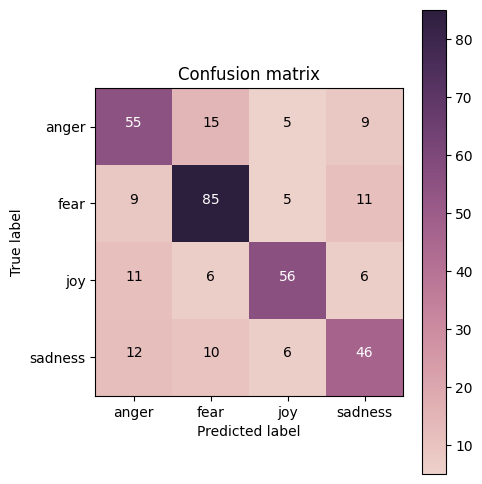

In [17]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

train_pred = naive_bayes.predict(X_train)
test_pred = naive_bayes.predict(X_test)

train_acc = accuracy_score(y_true=y_train, y_pred=train_pred)
test_acc = accuracy_score(y_true=y_test, y_pred=test_pred)

print('training accuracy: {}'.format(round(train_acc, 2)))
print('testing accuracy: {}'.format(round(test_acc, 2)))

print(classification_report(y_true=y_test, y_pred=test_pred))

cm = confusion_matrix(y_true=y_test, y_pred=test_pred)
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [ ]:
# result 分析
# training accuracy: 0.79
# testing accuracy: 0.7
# 1. accuracy
# training accuracy 並不是夠高, 代表 model 可能還不夠複雜, 但是 overfitting 的問題比較好一下
# 2,3 classification_report & confusion matrix
# fear and joy 的表現良好
# anger 和 sadness 的 percision 和 recall 都低. 表示在判定 anger 和 sadness 時, 正確率不高, 常誤判(偽陽), 也未能有效找到所有 anger 和 sadness 的 data





### Exercise 5 
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
# decision tree model 能夠把 data 分的很細, 但也因此容易 overfitting, 相對的 naive bayes model, 他對特徵的相互關係做簡化, 
# 因此不容易 overfitting, 但是也因此, 他的 accuracy 會比較低 (model 複雜度不夠, training accuracy 上不去)

### Exercise 6
Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

In [18]:
import keras
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)
def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input
# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)
# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)
# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)
model_output = H3
# create model
model = Model(inputs=[model_input], outputs=[model_output])
# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# show model construction
model.summary()
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('../logs/training_log.csv')
# training setting
epochs = 25
batch_size = 32
# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning:

Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.



113/113 [==============================] - 1s 3ms/step - loss: 1.3188 - accuracy: 0.3756 - val_loss: 1.2779 - val_accuracy: 0.4236
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 0.9650 - accuracy: 0.6460 - val_loss: 0.9300 - val_accuracy: 0.6657
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.7966 - val_loss: 0.8005 - val_accuracy: 0.6945
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8428 - val_loss: 0.7797 - val_accuracy: 0.7061
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8807 - val_loss: 0.8188 - val_accuracy: 0.7003
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.9017 - val_loss: 0.8661 - val_accuracy: 0.7003
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2338 - accuracy: 0.9228 - val_loss: 0.9105 - val_accuracy: 0.6715
Epoch 8/25
113/11

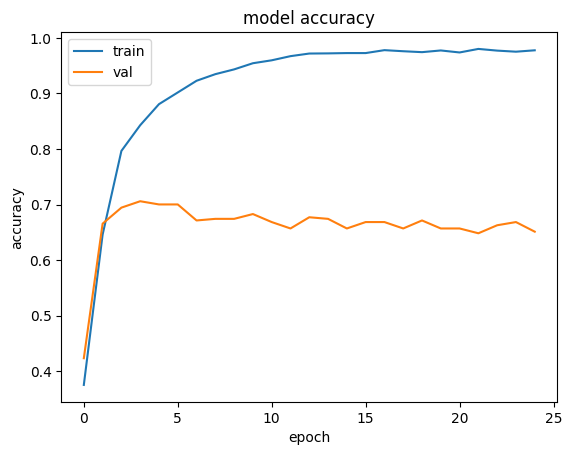

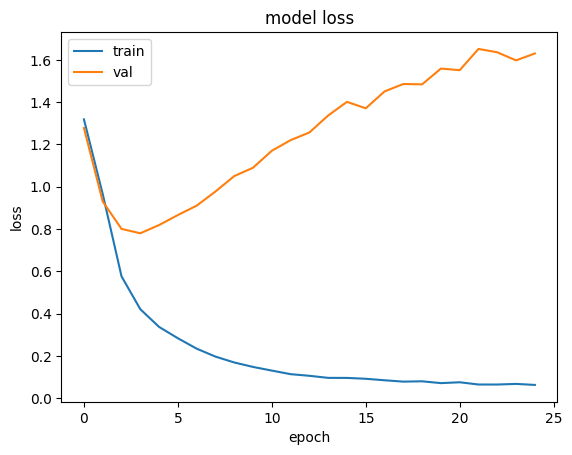

In [24]:
# plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# result 分析
# val 的 loss 暴升, 遠高於 training, 且 val 的 accuracy 也遠低於 training, 代表 model 有 overfitting 的問題 

### Exercise 7
Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

In [30]:
# prepare model
import gensim.downloader as api
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
glove_twitter_25_model = api.load('glove-twitter-25')
print('load ok')

# prepare data
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

load ok


array([list(['Grateful', 'for', 'all', 'the', 'hungry', 'people', 'in', 'my', 'life', '!', 'Hungry', 'to', 'learn', ',', 'change', ',', 'grow', ',', 'help', ',', 'etc', '-', 'not', 'sure', 'anybody', 'has', 'it', 'better', '!', '#', 'relentless']),
       list(['only', 'time', 'I', 'am', 'ever', 'cheering', 'for', 'you', 'Johnny']),
       list(['I', 'blame', 'the', 'whole', 'season', 'on', 'Natalie', '!', 'The', 'season', 'would', 'have', 'been', 'so', 'different', 'had', 'she', 'not', 'turned', 'her', 'back', 'on', 'her', 'alliance', '!', '#', 'pissed'])],
      dtype=object)

In [31]:
# Answer here
# 有許多方法可以將句子轉換成向量 送進 model train, 例如: 直接算 words 的 word vector 的平均, 或是使用 TF-IDF (加權過的平均) 等等, 以下展示最簡單的方法: 直接算 words 的 word vector 的平均

example_sentence = training_corpus[0]
print("example sentence",example_sentence)
word_vec_list = []
for word in example_sentence:
    if word in glove_twitter_25_model:
        word_vec_list.append(glove_twitter_25_model[word])
if len(word_vec_list) > 0:
    sentence_vec = np.mean(word_vec_list, axis=0)
else:
    sentence_vec = np.zeros(glove_twitter_25_model.vector_size)
    
print("sentence_vec: \n", sentence_vec)
print("sentence_vec shape: ", sentence_vec.shape)

example sentence ['Grateful', 'for', 'all', 'the', 'hungry', 'people', 'in', 'my', 'life', '!', 'Hungry', 'to', 'learn', ',', 'change', ',', 'grow', ',', 'help', ',', 'etc', '-', 'not', 'sure', 'anybody', 'has', 'it', 'better', '!', '#', 'relentless']
sentence_vec: 
 [ 0.17155291  0.03920062 -0.28089342 -0.01214091 -0.21230963  0.16572729
  1.147981    0.13933252 -0.28634545  0.20644441 -0.15624069 -0.06766885
 -4.5201244  -0.08233414 -0.00489651 -0.14345315 -0.07550607 -0.34061444
 -0.19595477 -0.47548634  0.02346351 -0.00851081 -0.12559846  0.2403838
  0.05736572]
sentence_vec shape:  (25,)


### Exercise 8
Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total)

In [26]:
# prepare model
from gensim.models import KeyedVectors
model_path = "../GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [27]:
# 找相似詞
word_list = ['angry', 'happy','sad','fear']
topn = 14
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)




angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'happy', 'glad', 'plea

target_size:  60
X_train.shape:  (260, 300)


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



X_tsne.shape:  (260, 2)


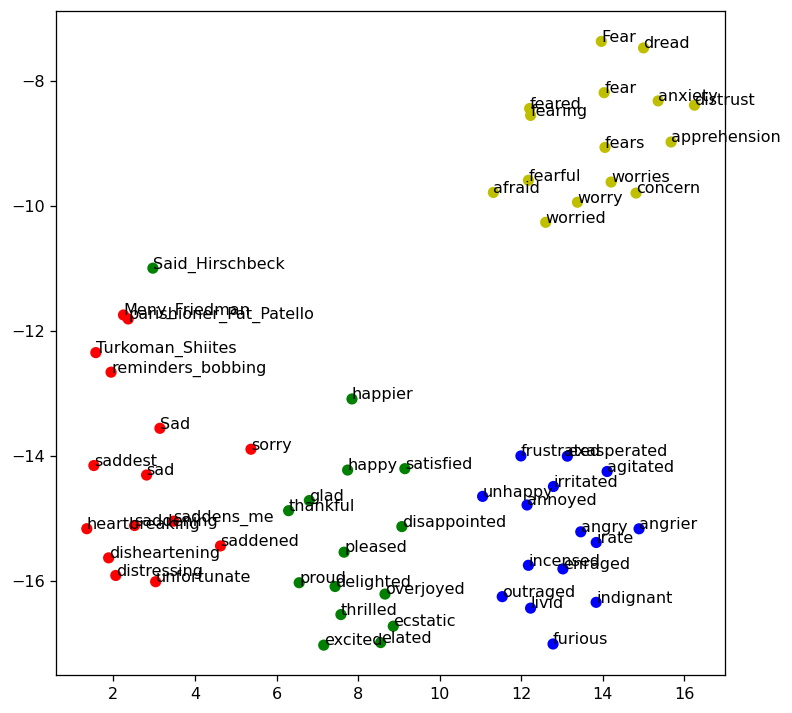

In [28]:
# 畫 t-SNE 圖
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = w2v_google_model
size = 200 
target_size = len(target_words)
print('target_size: ', target_size)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]
print('X_train.shape: ', X_train.shape)

tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)
print('X_tsne.shape: ', X_tsne.shape)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


# HW2 Kaggle Competition

In [33]:
# import pandas as pd
# import json

### pre-processing

1. 切分資料集, 獲得 train and valid and test data
2. 因為 emotion 分布不均, 所以每種 emotion 只會隨機取 min(每個 emotion 的數量) 個
3. 隨機 shuffle 資料集

In [34]:
# # #讀取 data .jason 檔案

# id = []
# text = []
# with open('../data/twitter/tweets_DM.json','r') as f:
#     for line in f:
#         json_data = json.loads(line)
#         tweet = json_data.get('_source', {}).get('tweet', {})
#         id.append(tweet.get('tweet_id'))
#         text.append(tweet.get('text'))

# raw_data_df = pd.DataFrame({'tweet_id': id, 'str': text})
# raw_data_df["text"] =  raw_data_df["str"].apply(lambda x: [x])
# print(raw_data_df.head())
# print(raw_data_df.shape)

   tweet_id                                                str  \
0  0x376b20  People who post "add me on #Snapchat" must be ...   
1  0x2d5350  @brianklaas As we see, Trump is dangerous to #...   
2  0x28b412  Confident of your obedience, I write to you, k...   
3  0x1cd5b0                Now ISSA is stalking Tasha 😂😂😂 <LH>   
4  0x2de201  "Trust is not the same as faith. A friend is s...   

                                                text  
0  [People who post "add me on #Snapchat" must be...  
1  [@brianklaas As we see, Trump is dangerous to ...  
2  [Confident of your obedience, I write to you, ...  
3              [Now ISSA is stalking Tasha 😂😂😂 <LH>]  
4  ["Trust is not the same as faith. A friend is ...  
(1867535, 3)


In [35]:
# # 讀取 emition.csv 檔案
# emotion_df = pd.read_csv('../data/twitter/emotion.csv')
# merged_df = pd.merge(raw_data_df, emotion_df, on='tweet_id',how='left')
# print(merged_df.head())


   tweet_id                                                str  \
0  0x376b20  People who post "add me on #Snapchat" must be ...   
1  0x2d5350  @brianklaas As we see, Trump is dangerous to #...   
2  0x28b412  Confident of your obedience, I write to you, k...   
3  0x1cd5b0                Now ISSA is stalking Tasha 😂😂😂 <LH>   
4  0x2de201  "Trust is not the same as faith. A friend is s...   

                                                text       emotion  
0  [People who post "add me on #Snapchat" must be...  anticipation  
1  [@brianklaas As we see, Trump is dangerous to ...       sadness  
2  [Confident of your obedience, I write to you, ...           NaN  
3              [Now ISSA is stalking Tasha 😂😂😂 <LH>]          fear  
4  ["Trust is not the same as faith. A friend is ...           NaN  


In [36]:
# #切分 train and test data
# split_csv = pd.read_csv('../data/twitter/data_identification.csv')

# train_data = merged_df[merged_df["tweet_id"].isin(split_csv[split_csv["identification"] == "train"]["tweet_id"])]
# test_data = merged_df[merged_df["tweet_id"].isin(split_csv[split_csv["identification"] == "test"]["tweet_id"])]
# train_data.reset_index(drop=True, inplace=True)
# test_data.reset_index(drop=True, inplace=True)

# print(train_data.shape)
# print(test_data.shape)
# print(train_data.head())
# print(test_data.head())

(1455563, 4)
(411972, 4)
   tweet_id                                                str  \
0  0x376b20  People who post "add me on #Snapchat" must be ...   
1  0x2d5350  @brianklaas As we see, Trump is dangerous to #...   
2  0x1cd5b0                Now ISSA is stalking Tasha 😂😂😂 <LH>   
3  0x1d755c  @RISKshow @TheKevinAllison Thx for the BEST TI...   
4  0x2c91a8       Still waiting on those supplies Liscus. <LH>   

                                                text       emotion  
0  [People who post "add me on #Snapchat" must be...  anticipation  
1  [@brianklaas As we see, Trump is dangerous to ...       sadness  
2              [Now ISSA is stalking Tasha 😂😂😂 <LH>]          fear  
3  [@RISKshow @TheKevinAllison Thx for the BEST T...           joy  
4     [Still waiting on those supplies Liscus. <LH>]  anticipation  
   tweet_id                                                str  \
0  0x28b412  Confident of your obedience, I write to you, k...   
1  0x2de201  "Trust is not the s

In [37]:
# # check 

# check_train_emotion = train_data["emotion"].value_counts()
# print("train:\n",check_train_emotion)

# check_test_emotion = test_data["emotion"].value_counts()
# print("test\n",check_test_emotion)

train:
 joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: emotion, dtype: int64
test
 Series([], Name: emotion, dtype: int64)


In [38]:
# # 存成 pkl 檔案
# train_data.to_pickle('../data/twitter/train_data.pkl')
# test_data.to_pickle('../data/twitter/test_data.pkl')

In [39]:
import pandas as pd
# 抓 pkl 檔案
all_train_data = pd.read_pickle('../data/twitter/train_data.pkl')
all_test_data = pd.read_pickle('../data/twitter/test_data.pkl')

all_train_data.drop_duplicates(subset=['str'], inplace=True, keep='first')

# 查看 train_data 的 emotion 分布
check_train_emotion = all_train_data["emotion"].value_counts()
print("train:\n",check_train_emotion)
min_count = check_train_emotion.min()
# 從 train_data 對每種 emotion 都隨機抽 39867 筆出來

down_sampled_train_data = pd.DataFrame()
for emotion in all_train_data["emotion"].unique():
    sample = all_train_data[all_train_data["emotion"] == emotion].sample(n=min_count, random_state=1)
    down_sampled_train_data = pd.concat([down_sampled_train_data, sample])

# print(down_sampled_train_data.shape)
# print(down_sampled_train_data.head())
# print(down_sampled_train_data.tail())

# 發現是按照 emotion 排序的，所以要 shuffle
down_sampled_train_data = down_sampled_train_data.sample(frac=1, random_state=1)

# print(down_sampled_train_data.shape)
# print(down_sampled_train_data.head())
# print(down_sampled_train_data.tail())

down_sampled_train_data.reset_index(drop=True, inplace=True)
print(down_sampled_train_data.head())
print(down_sampled_train_data.tail())

check_train_emotion = down_sampled_train_data["emotion"].value_counts()
print("train:\n",check_train_emotion)


train:
 joy             514266
anticipation    248695
trust           204885
sadness         193198
disgust         138996
fear             63821
surprise         48205
anger            39712
Name: emotion, dtype: int64
   tweet_id                                                str  \
0  0x2f3224  ‘[FREE] Epic Pop Hip Hop Beat - Crazy Rap R&B ...   
1  0x21c86e                       @luvselefantes I know ❤ <LH>   
2  0x2700e9                           <LH> is the #HardestPart   
3  0x34860d  This baby daddy is such a piece of shit. <LH> ...   
4  0x1e65d7  Thousands of miserable blistering iconoclasts ...   

                                                text       emotion  
0  [‘[FREE] Epic Pop Hip Hop Beat - Crazy Rap R&B...      surprise  
1                     [@luvselefantes I know ❤ <LH>]         trust  
2                         [<LH> is the #HardestPart]  anticipation  
3  [This baby daddy is such a piece of shit. <LH>...      surprise  
4  [Thousands of miserable blistering 

In [40]:
# 切 data train -> train and valid include x and y
# 切 data test -> test include x and y

from sklearn.model_selection import train_test_split

train_data, valid_data = train_test_split(down_sampled_train_data, test_size=0.2, random_state=1)
print(train_data.shape)
print(valid_data.shape)

train_data.reset_index(drop=True, inplace=True)
valid_data.reset_index(drop=True, inplace=True)





(254156, 4)
(63540, 4)


### 特徵工程
1. 使用 TF-IDF 產生 10000 維的向量
2. 將 emotion 轉成 one-hot encoding

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from scipy.sparse import csr_matrix
import tensorflow as tf
import numpy as np
# nltk.download('punkt')

# TF -IDF 特徵
TF_IDF = TfidfVectorizer(max_features=10000, tokenizer=nltk.word_tokenize)
TF_IDF.fit(train_data["str"])

train_data_TF_IDF = TF_IDF.transform(train_data["str"])

print(train_data_TF_IDF.shape)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(254156, 10000)


In [42]:
feature_names = TF_IDF.get_feature_names()
print(feature_names[9990:10000])

['🤬', '🤷\u200d♀️', '🤷🏻\u200d♀️', '🤷🏼\u200d♀️', '🤷🏽\u200d♀️', '🤷🏽\u200d♂️', '🤷🏾\u200d♀️', '🤷🏾\u200d♂️', '🦃', '🦋']


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [43]:
def convert_to_sparse_tensor(csr_mat):
    coo = csr_mat.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data.astype(np.float32), coo.shape)

x_train = TF_IDF.transform(train_data["str"])
x_train = convert_to_sparse_tensor(x_train)
x_train = tf.sparse.reorder(x_train)


y_train = train_data["emotion"]

x_valid = TF_IDF.transform(valid_data["str"])
x_valid = convert_to_sparse_tensor(x_valid)
x_valid = tf.sparse.reorder(x_valid)
y_valid = valid_data["emotion"]

x_test = TF_IDF.transform(all_test_data["str"])
x_test = convert_to_sparse_tensor(x_test)
x_test = tf.sparse.reorder(x_test)

print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)





(254156, 10000)
(254156,)
(63540, 10000)
(63540,)
(411972, 10000)


In [44]:
import keras
import numpy as np
from sklearn.preprocessing import LabelEncoder

label_coder = LabelEncoder()
label_coder.fit(y_train)

def label_encode(coder,label):
    one_hot = coder.transform(label)
    return keras.utils.to_categorical(one_hot)

def label(coder,one_hot):
    predict = np.argmax(one_hot, axis=1)
    return coder.inverse_transform(predict)

print("check label_encode and label function")
print(label_coder.classes_)
print(y_train[:5])
print(y_train.shape)

y_train_one_hot = label_encode(label_coder,y_train)
y_valid_one_hot = label_encode(label_coder,y_valid)

print(y_train_one_hot.shape)
print(y_train_one_hot[:5])

check label_encode and label function
['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']
0     sadness
1       trust
2         joy
3        fear
4    surprise
Name: emotion, dtype: object
(254156,)
(254156, 8)
[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]


In [45]:
input_shape = x_train.shape[1]
print(input_shape)

out_put_shape = len(label_coder.classes_)
print(out_put_shape)


10000
8


### model 
1. 使用最簡單的 DNN model

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.layers import Dropout

model_input = Input(shape=(input_shape,))
layer1 = Dense(1024)(model_input)
active1 = ReLU()(layer1)
dropout1 = Dropout(0.5)(active1)
layer2 = Dense(512)(dropout1)
active2 = ReLU()(layer2)
dropout2 = Dropout(0.5)(active2)
layer3 = Dense(256)(dropout2)
active3 = ReLU()(layer3)
dropout3 = Dropout(0.5)(active3)
layer4 = Dense(128)(dropout3)
active4 = ReLU()(layer4)
dropout4 = Dropout(0.5)(active4)
layer5 = Dense(8)(dropout4)
active5 = Softmax()(layer5)
output = active5
model = Model(inputs=model_input, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')
# training setting
epochs = 25
batch_size = 64

history = model.fit(x_train, y_train_one_hot, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(x_valid, y_valid_one_hot), 
                    callbacks=[csv_logger])


In [ ]:
import matplotlib.pyplot as plt
# 劃出 loss 和 accuracy 的圖
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="valid_loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="valid_accuracy")
plt.legend()
plt.show()

last_val_accuracy = history.history['val_accuracy'][-1]

In [ ]:
## predict
pred_result = model.predict(x_test, batch_size=128)
pred_result[:5]

In [ ]:
pred_result = label(label_coder, pred_result)
pred_result[:5]

In [ ]:
# 合併 x_test 回 all_test_data
all_test_data["emotion"] = pred_result
print(all_test_data.head())
print(all_test_data.shape)

# 读取 CSV 文件
ans_csv = pd.read_csv('../data/twitter/sampleSubmission.csv')

# 根據 tweet_id 和 id 進行合併
merged_data = pd.merge(ans_csv, all_test_data[['tweet_id', 'emotion']], left_on='id', right_on='tweet_id', how='left')

merged_data['emotion'] = merged_data['emotion_y']

# 刪除重複的 tweet_id 列
merged_data.drop(['tweet_id','emotion_x','emotion_y'], axis=1, inplace=True)


# 保存更改后的数据到新的 CSV 文件
merged_data.to_csv(f'{last_val_accuracy}.csv', index=False)

# 打印完成信息
print("\n已保存 CSV 文件。")